Loading libraries

In [1]:
%matplotlib inline
from load_covid_data import load_covid_data
import numpy as np
from sklearn.neural_network import MLPClassifier
from accuracy_score import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
from GridSearch import *

Loading covid dataset and splitting in train / test

In [2]:

# Loading covid dataset
headers, X, Y = load_covid_data()

n_datapoints = 1000

X = X[: n_datapoints, :] 
Y = Y[: n_datapoints] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

Training model

In [3]:

layers = [12,10,8]
classifier = MLPClassifier(solver="adam", hidden_layer_sizes=layers, random_state=1, activation="relu")
classifier.fit(X_train, Y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[12, 10, 8], random_state=1)

Testing model with a prediction

In [4]:
y_pred = classifier.predict(X_test)
print(accuracy_score(y_pred, Y_test))

[[ 57   4]
 [  2 137]]
0.97


Grid searching on hyperparameters for the MLP

alpha:1e-05, momentum :1e-06 gives accuracy 0.95
alpha:1e-05, momentum :1e-05 gives accuracy 0.96
alpha:1e-05, momentum :0.0001 gives accuracy 0.97
alpha:1e-05, momentum :0.001 gives accuracy 0.965
alpha:1e-05, momentum :0.01 gives accuracy 0.97
alpha:1e-05, momentum :0.1 gives accuracy 0.96
alpha:1e-05, momentum :1.0 gives accuracy 0.975
alpha:0.0001, momentum :1e-06 gives accuracy 0.965
alpha:0.0001, momentum :1e-05 gives accuracy 0.96
alpha:0.0001, momentum :0.0001 gives accuracy 0.95
alpha:0.0001, momentum :0.001 gives accuracy 0.975
alpha:0.0001, momentum :0.01 gives accuracy 0.96
alpha:0.0001, momentum :0.1 gives accuracy 0.97
alpha:0.0001, momentum :1.0 gives accuracy 0.955
alpha:0.001, momentum :1e-06 gives accuracy 0.97
alpha:0.001, momentum :1e-05 gives accuracy 0.965
alpha:0.001, momentum :0.0001 gives accuracy 0.97
alpha:0.001, momentum :0.001 gives accuracy 0.965
alpha:0.001, momentum :0.01 gives accuracy 0.965
alpha:0.001, momentum :0.1 gives accuracy 0.97
alpha:0.001, mo

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


alpha:1.0, momentum :0.1 gives accuracy 0.96
alpha:1.0, momentum :1.0 gives accuracy 0.96


/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


alpha:10.0, momentum :1e-06 gives accuracy 0.96


/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


alpha:10.0, momentum :1e-05 gives accuracy 0.915


/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


alpha:10.0, momentum :0.0001 gives accuracy 0.855


/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


alpha:10.0, momentum :0.001 gives accuracy 0.895


/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


alpha:10.0, momentum :0.01 gives accuracy 0.875
alpha:10.0, momentum :0.1 gives accuracy 0.94


/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


alpha:10.0, momentum :1.0 gives accuracy 0.89


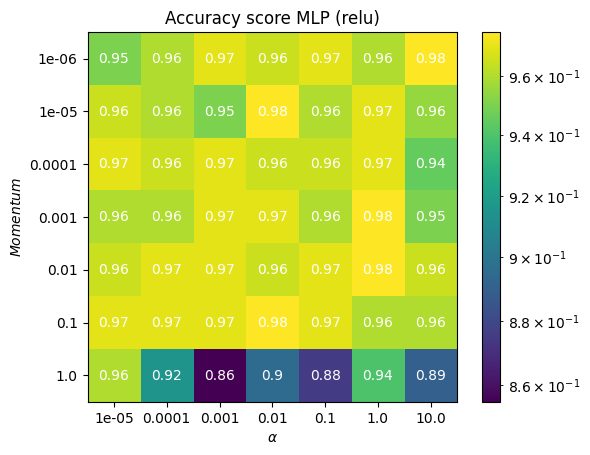

In [5]:
grid_search_hyperparameters_MLP(X_train, X_test, Y_train, Y_test, "Accuracy score MLP (relu)", func="relu", verbose=True)

Plotting accuracy score over epoch

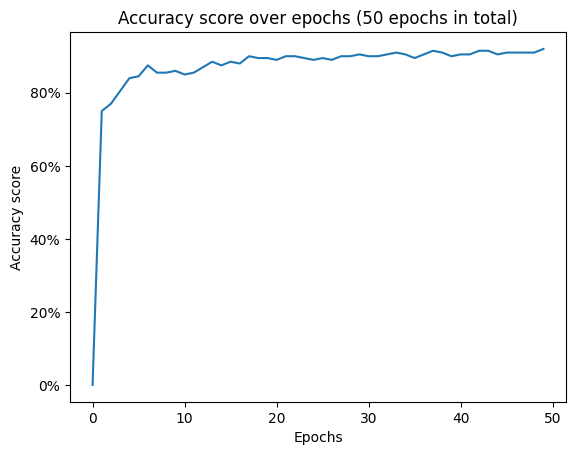

In [6]:
# Ignoring convergence warning for not bloating the output
warnings.filterwarnings("ignore", category=ConvergenceWarning)
max_epochs = 50

predictions = np.zeros(max_epochs)

for i in range(1, max_epochs):
    classifier = MLPClassifier(solver="adam", hidden_layer_sizes=layers, random_state=1, activation="relu", max_iter= i)
    classifier.fit(X_train, Y_train)
    predictions[i] = accuracy_score(classifier.predict(X_test), Y_test, conf = False)

plt.figure()
plt.plot(predictions * 100)
plt.xlabel("Epochs")
plt.ylabel("Accuracy score")
plt.title(f"Accuracy score over epochs ({max_epochs} epochs in total)")
plt.savefig("../figures/accuracy_over_epochs_mlp")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()